# Drill: TLADS

Using a FIFA 2019 complete player dataset, I select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. I'll explore the variables using the univariate and bivariate methods.

# 1. Exploratory Data Analysis (EDA)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sts
sns.set_style("white") # set the default plot aesthetics to be prettier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset 
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\fifa2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

The dataset is large. It contains 89 columns (variables) and 18207 entries. I'll take a subset of the data to work with more useful features

In [3]:
# take a subset of the data to make plots clearer
df1 = df.loc[:, ['Club', 'Nationality','Position', 'Age', 'Overall', 'Height', 'Weight', 'Balance', 'SprintSpeed', 'BallControl',
                 'Stamina', 'Aggression','Acceleration', 'ShotPower', 
                 'Agility', 'ShortPassing', 'Body Type']].reset_index(drop = True)


In [4]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Club,241,0.013237
Position,60,0.003295
BallControl,48,0.002636
Height,48,0.002636
Weight,48,0.002636
Balance,48,0.002636
ShortPassing,48,0.002636
Body Type,48,0.002636
Stamina,48,0.002636
Aggression,48,0.002636


Data subset has 18 columns and 18206 entries for each column. There are missing values in this subset and I need some data cleaning.

## 1.2 Data Cleaning & Manipulation

In [5]:
# to deal with missing values, I'll just drop them
df1.dropna(inplace = True)
df1.head()

,Club,Nationality,Position,Age,Overall,Height,Weight,Balance,SprintSpeed,BallControl,Stamina,Aggression,Acceleration,ShotPower,Agility,ShortPassing,Body Type
0,FC Barcelona,Argentina,RF,31,94,5'7,159lbs,95.0,86.0,96.0,72.0,48.0,91.0,85.0,91.0,90.0,Messi
1,Juventus,Portugal,ST,33,94,6'2,183lbs,70.0,91.0,94.0,88.0,63.0,89.0,95.0,87.0,81.0,C. Ronaldo
2,Paris Saint-Germain,Brazil,LW,26,92,5'9,150lbs,84.0,90.0,95.0,81.0,56.0,94.0,80.0,96.0,84.0,Neymar
3,Manchester United,Spain,GK,27,91,6'4,168lbs,43.0,58.0,42.0,43.0,38.0,57.0,31.0,60.0,50.0,Lean
4,Manchester City,Belgium,RCM,27,91,5'11,154lbs,77.0,76.0,91.0,90.0,76.0,78.0,91.0,79.0,92.0,Normal


In [6]:
df1['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [7]:
# clean 'Height', 'Weight' columns and convert them to float
df1['Height'] = df1['Height'].str.replace("'", '.').astype(float)
df1['Weight'] = df1['Weight'].str.replace('lbs', '').astype(float)

# standardize Body Type column 
df1['Body Type'] = df1['Body Type'].str.replace('C. Ronaldo', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Neymar', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Messi', 'Lean')
df1['Body Type'] = df1['Body Type'].str.replace('Courtois', 'Normal')
df1['Body Type'] = df1['Body Type'].str.replace('Shaqiri', 'Stocky')
df1['Body Type'] = df1['Body Type'].str.replace('Akinfenwa', 'Stocky')
df1['Body Type'] = df1['Body Type'].str.replace('PLAYER_BODY_TYPE_25', 'Normal')

df1.dtypes

Club             object
Nationality      object
Position         object
Age               int64
Overall           int64
Height          float64
Weight          float64
Balance         float64
SprintSpeed     float64
BallControl     float64
Stamina         float64
Aggression      float64
Acceleration    float64
ShotPower       float64
Agility         float64
ShortPassing    float64
Body Type        object
dtype: object

In [8]:
# check again for missing values
df1.isnull().sum().max()

0

# 2. Feature Engineering
## 2.1 Making new indicator variable
I'll make a new 'Champions' indicator that tells us if a row has data from the all time world football champion nationalities.

In [15]:
df1.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [16]:
# creating a data frame to hold my features.
features = pd.get_dummies(df1['Nationality'])

# Champion nationalities dummy
features['Champions'] = np.where((df1['Nationality'].isin(['Argentina', 'Brazil', 'Italy', 'Germany', 'France',
                                                                    'England', 'Spain', 'Urugvay'])), 1, 0)
# Which non-Champion nationality clubs have more players from Champion nationalities
pd.crosstab(features['Champions'], df1['Club']).stack()[0].sort_values(ascending = False).head(20)

Club
De Graafschap                 30
AZ Alkmaar                    29
FC Emmen                      29
Guadalajara                   29
Júbilo Iwata                  29
Shonan Bellmare               29
Puebla FC                     29
Yokohama F. Marinos           29
Sagan Tosu                    29
Club León                     28
Cerezo Osaka                  28
Deportes Tolima               28
Sangju Sangmu FC              28
Al Raed                       28
Club Necaxa                   28
Club Atlas                    28
Hokkaido Consadole Sapporo    28
Houston Dynamo                28
Gamba Osaka                   28
Independiente Santa Fe        28
dtype: int64

Japanese, Mexican and Holland clubs have more players from Champion nationalities than other countries. 

## 2.2 Changing variable types
Here I'll take "Age" continuous variable and make it categorical to compare older players to younger ones.  Usually, a football player is at its peak between 24-29 years of age and usually plays at International level till the age of 34-36. I'll take 29 as a threshold.

In [17]:
# Players older than 29 years
features['OldPlayers'] = np.where((df1['Age']>29), 1, 0)
print(df1['Age'].groupby(features['OldPlayers']).describe())

              count       mean       std   min   25%   50%   75%   max
OldPlayers                                                            
0           14480.0  23.415815  3.325633  16.0  21.0  23.0  26.0  29.0
1            3438.0  32.220768  2.165500  30.0  30.0  32.0  34.0  45.0


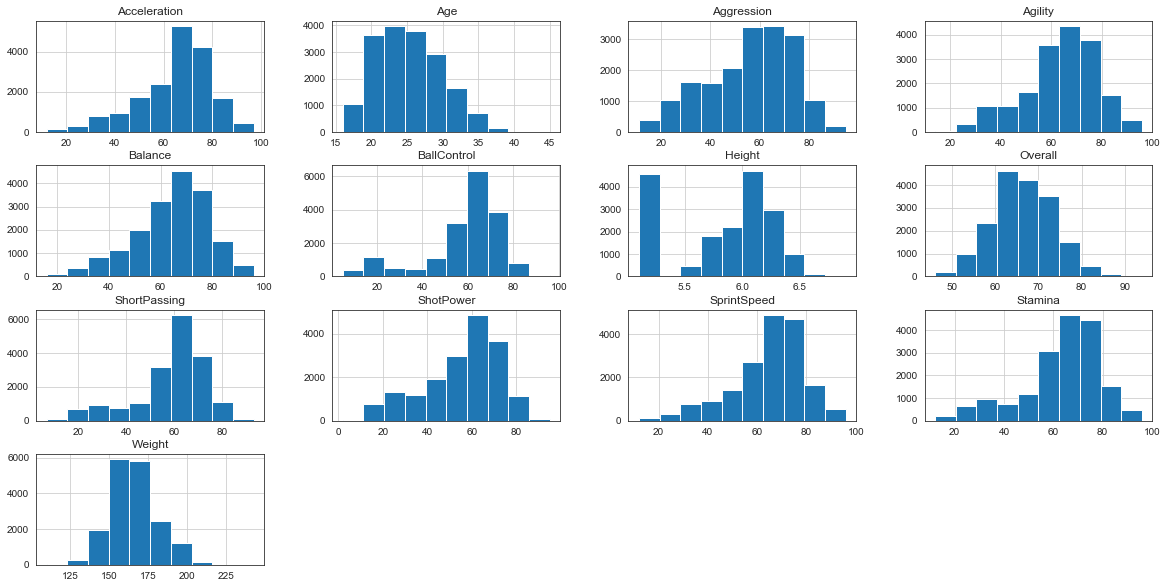

In [18]:
# dealing with non-normality
df1.hist(figsize = (20, 10))
plt.show()

Pretty much all features look normally distributed, except Height. I'll not use this

In [19]:
# Stamina & Agility
means_1 = df1[['Stamina','Agility']].mean(axis=0)
stds_1 = df[['Stamina', 'Agility']].std(axis=0)
features['Stam_Agil'] = ((df1[['Stamina','Agility']] - means_1) / stds_1).mean(axis=1)

# Aggression & BallControl
means_2 = df1[['Aggression','BallControl']].mean(axis=0)
stds_2 = df1[['Aggression', 'BallControl']].std(axis=0)
features['Agg_Ball'] = ((df1[['Aggression','BallControl']] - means_2) / stds_2).mean(axis=1)

# Acceleration & ShotPower
means_3 = df1[['Acceleration','ShotPower']].mean(axis=0)
stds_3 = df1[['Acceleration','ShotPower']].std(axis=0)
features['Accel_Shot'] = ((df1[['Acceleration','ShotPower']] - means_3) / stds_3).mean(axis=1)


# Acceleration & ShotPower
means_4 = df1[['SprintSpeed','Balance']].mean(axis=0)
stds_4 = df1[['SprintSpeed','Balance']].std(axis=0)
features['Speed_Balance'] = ((df1[['SprintSpeed','Balance']] - means_4) / stds_4).mean(axis=1)

# Acceleration & ShotPower
means_5 = df1[['ShortPassing','Overall']].mean(axis=0)
stds_5 = df1[['ShortPassing','Overall']].std(axis=0)
features['Short_Overall'] = ((df1[['ShortPassing','Overall']] - means_5) / stds_5).mean(axis=1)

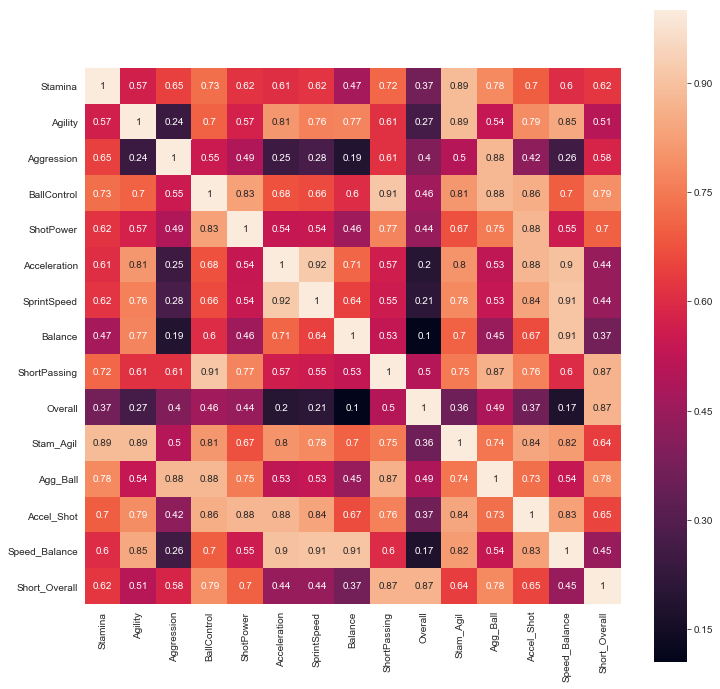

In [21]:
# how well the compositions correlate with each of the individual variables.
plotdf = df1.loc[:, ['Stamina', 'Agility', 'Aggression','BallControl', 'ShotPower', 'Acceleration', 'SprintSpeed',
                    'Balance', 'ShortPassing', 'Overall']]


plotdf['Stam_Agil'] = features['Stam_Agil']
plotdf['Agg_Ball'] = features['Agg_Ball']
plotdf['Accel_Shot'] = features['Accel_Shot']
plotdf['Speed_Balance'] = features['Speed_Balance']
plotdf['Short_Overall'] = features['Short_Overall']

# plot heatmap
# print correlations
corrmat = plotdf.corr()
fig, ax = plt.subplots(figsize = (12,12))
_ = sns.heatmap(corrmat, square = True, annot = True)
plt.show()